In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [270]:
# Set default options
pd.options.display.width = 0
pd.options.display.max_rows=300

In [271]:
# Read the dataframe
df = pd.read_csv('dataset/house-data.csv')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [272]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [273]:
df.shape

(1460, 81)

In [274]:
# Check for null values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Data Clean up - Impute missing data

In [275]:
''' Total number of records are 1460 and the below columns are having most of the null values.
 - Alley : 1369
 - PoolQC : 1453
 - Fence : 1179
 - MiscFeature : 1406
 
 So, we can remove these features.
 
 The below features have some null values. Need to replace them
 
 - LotFrontage       259
 - MasVnrType          8
 - MasVnrArea          8
 - BsmtQual           37
 - BsmtCond           37
 - BsmtExposure       38
 - BsmtFinType1       37
 - BsmtFinType2       38
 - Electrical          1
 - FireplaceQu       690
 - GarageType         81
 - GarageYrBlt        81
 - GarageFinish       81
 - GarageQual         81
 - GarageCond         81
 - PoolQC           1453
 - Fence            1179
 - MiscFeature      1406 
 
'''


' Total number of records are 1460 and the below columns are having most of the null values.\n - Alley : 1369\n - PoolQC : 1453\n - Fence : 1179\n - MiscFeature : 1406\n \n So, we can remove these features.\n \n The below features have some null values. Need to replace them\n \n - LotFrontage       259\n - MasVnrType          8\n - MasVnrArea          8\n - BsmtQual           37\n - BsmtCond           37\n - BsmtExposure       38\n - BsmtFinType1       37\n - BsmtFinType2       38\n - Electrical          1\n - FireplaceQu       690\n - GarageType         81\n - GarageYrBlt        81\n - GarageFinish       81\n - GarageQual         81\n - GarageCond         81\n - PoolQC           1453\n - Fence            1179\n - MiscFeature      1406 \n \n'

In [276]:
df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [277]:
df.shape

(1460, 77)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [279]:
## Fill null values for the applicable features as per the below rule:
#  a. For Categorical features, replace null values with the MODE of the feature (maximum occuring value)
#  b. For Numerical features, replace null values with the MEAN of the feature
#
def replace_null(data,columns):
    for col_name in columns:
        col = df[col_name]
        
        if col.dtype == 'O':
            max_val = col.mode().any()
        elif (col.dtype == 'int64' or col.dtype == 'float64'):
            max_val = col.mean()
            
        # Replace
        col = col.fillna(max_val,inplace=True)
        

In [280]:
features_to_replace_null = ['LotFrontage','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
replace_null(df,features_to_replace_null)

In [307]:
df.isnull().sum().any()

False

# Data Analysis

## 1. Univariate analysis

In [210]:
# Kernel Density Plot - For NUMERICAL features
def kde_plot(plot_index,column_name, title):
    sub_plot = sns.kdeplot(x=df[column_name],shade=True,palette='Blues',ax=plot_index)
    sub_plot.set_title(title)
    
# Bar Plot - For NUMERICAL features
def bar_plot(plot_index,column_name, title):
    sub_plot = sns.barplot(x=df[column_name],shade=True,palette='Blues',ax=plot_index)
    sub_plot.set_title(title)
    
# Count plot - For CATEGORICAL features    
def count_plot(plot_index,column_name, title):
    sub_plot = sns.countplot(x=df[column_name],palette='Blues',ax=plot_index)
    sub_plot.set_title(title)

    
def univariate_analysis(dataframe,column_data,row_count,col_count):
    figure,axis = plt.subplots(row_count,col_count,figsize=(50,60))
    
    row_id = 0
    col_id = 0
    
    for col_name,column_desc in column_data.items():
        
        col = df[col_name]
        
        if col.dtype == 'O':
            count_plot(axis[row_id,col_id],col_name,column_desc)
        elif (col.dtype == 'int64' or col.dtype == 'float64'):
            kde_plot(axis[row_id,col_id],col_name,column_desc)
            #bar_plot(axis[row_id,col_id],col_name,column_desc)
        
        
        col_id += 1
        # After using the last column in a row, select the next row
        if(col_id == col_count):
            row_id +=1
            col_id = 0
    
    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=1.2, 
                wspace=0.4, 
                hspace=0.4)
    plt.savefig('univariate-analysis.jpeg',bbox_inches='tight')

In [213]:
# Define the columns and their descriptions
column_data = {
            'MSSubClass':'Type of dwelling involved in the sale.',
            'MSZoning':'General zoning classification of the sale.',
            'LotFrontage':'Linear feet of street connected to property',
            'LotArea':'Lot size in square feet',
            'Street':'Type of road access to property',
            'LotShape':'General shape of property',
            'LandContour':'Flatness of the property',
            'Utilities':'Type of utilities available',
            'LotConfig':'Lot configuration',
            'LandSlope':'Slope of property',
            'Neighborhood':'Physical locations within Ames city limits',
            'Condition1':'Proximity to various conditions',
            'Condition2':'Proximity to various conditions (if multiple)',
            'BldgType':'Type of dwelling',
            'HouseStyle':'Style of dwelling',
            'OverallQual':'Overall material and finish of the house',
            'OverallCond':'Overall condition of the house',
            'YearBuilt':'Original construction date',
            'YearRemodAdd':'Remodelling date',
            'RoofStyle':'Type of roof',
            'RoofMatl':'Roof material',
            'Exterior1st':'Exterior covering on house',
            'Exterior2nd':'Exterior covering on house (multiple material)',
            'MasVnrType':'Masonry veneer type',
            'MasVnrArea':'Masonry veneer area in square feet',
            'ExterQual':'Quality of the material on the exterior ',
            'ExterCond':'Present condition of the material on the exterior',
            'Foundation':'Type of foundation',
            'BsmtQual':'Height of the basement',
            'BsmtCond':'General condition of the basement',
            'BsmtExposure':'Walkout or garden level walls',
            'BsmtFinType1':'Rating of basement finished area',
            'BsmtFinSF1':'Type 1 finished square feet',
            'BsmtFinType2':'Rating of basement finished area (if multiple types)',
            'BsmtFinSF2':'Type 2 finished square feet',
            'BsmtUnfSF':'Unfinished square feet of basement area',
            'TotalBsmtSF':'Total square feet of basement area',
            'Heating':'Type of heating',
            'HeatingQC':'Heating quality and condition',
            'CentralAir':'Central air conditioning',
            'Electrical':'Electrical system',
            '1stFlrSF':'First Floor square feet',
            '2ndFlrSF':'Second floor square feet',
            'LowQualFinSF':'Low quality finished square feet (all floors)',
            'GrLivArea':'Above grade (ground) living area square feet',
            'BsmtFullBath':'Basement full bathrooms',
            'BsmtHalfBath':'Basement half bathrooms',
            'FullBath':'Full bathrooms above grade',
            'HalfBath':'Half baths above grade',
            'BedroomAbvGr':'Bedrooms above grade (does NOT include basement bedrooms)',
            'KitchenAbvGr':'Kitchens above grade',
            'KitchenQual':'Kitchen quality',
            'TotRmsAbvGrd':'Total rooms above grade (does not include bathrooms)',
            'Functional':'Home functionality (Assume typical unless deductions are warranted)',
            'Fireplaces':'Number of fireplaces',
            'FireplaceQu':'Fireplace quality',
            'GarageType':'Garage location',
            'GarageYrBlt':'Year garage was built',
            'GarageFinish':'Interior finish of the garage',
            'GarageCars':'Size of garage in car capacity',
            'GarageArea':'Size of garage in square feet',
            'GarageQual':'Garage quality',
            'GarageCond':'Garage condition',
            'PavedDrive':'Paved driveway',
            'WoodDeckSF':'Wood deck area in square feet',
            'OpenPorchSF':'Open porch area in square feet',
            'EnclosedPorch':'Enclosed porch area in square feet',
            '3SsnPorch':'Three season porch area in square feet',
            'ScreenPorch':'Screen porch area in square feet',
            'PoolArea':'Pool area in square feet',
            'MiscVal':'$Value of miscellaneous feature',
            'MoSold':'Month Sold (MM)',
            'YrSold':'Year Sold (YYYY)',
            'SaleType':'Type of sale',
            'SaleCondition':'Condition of sale'
}

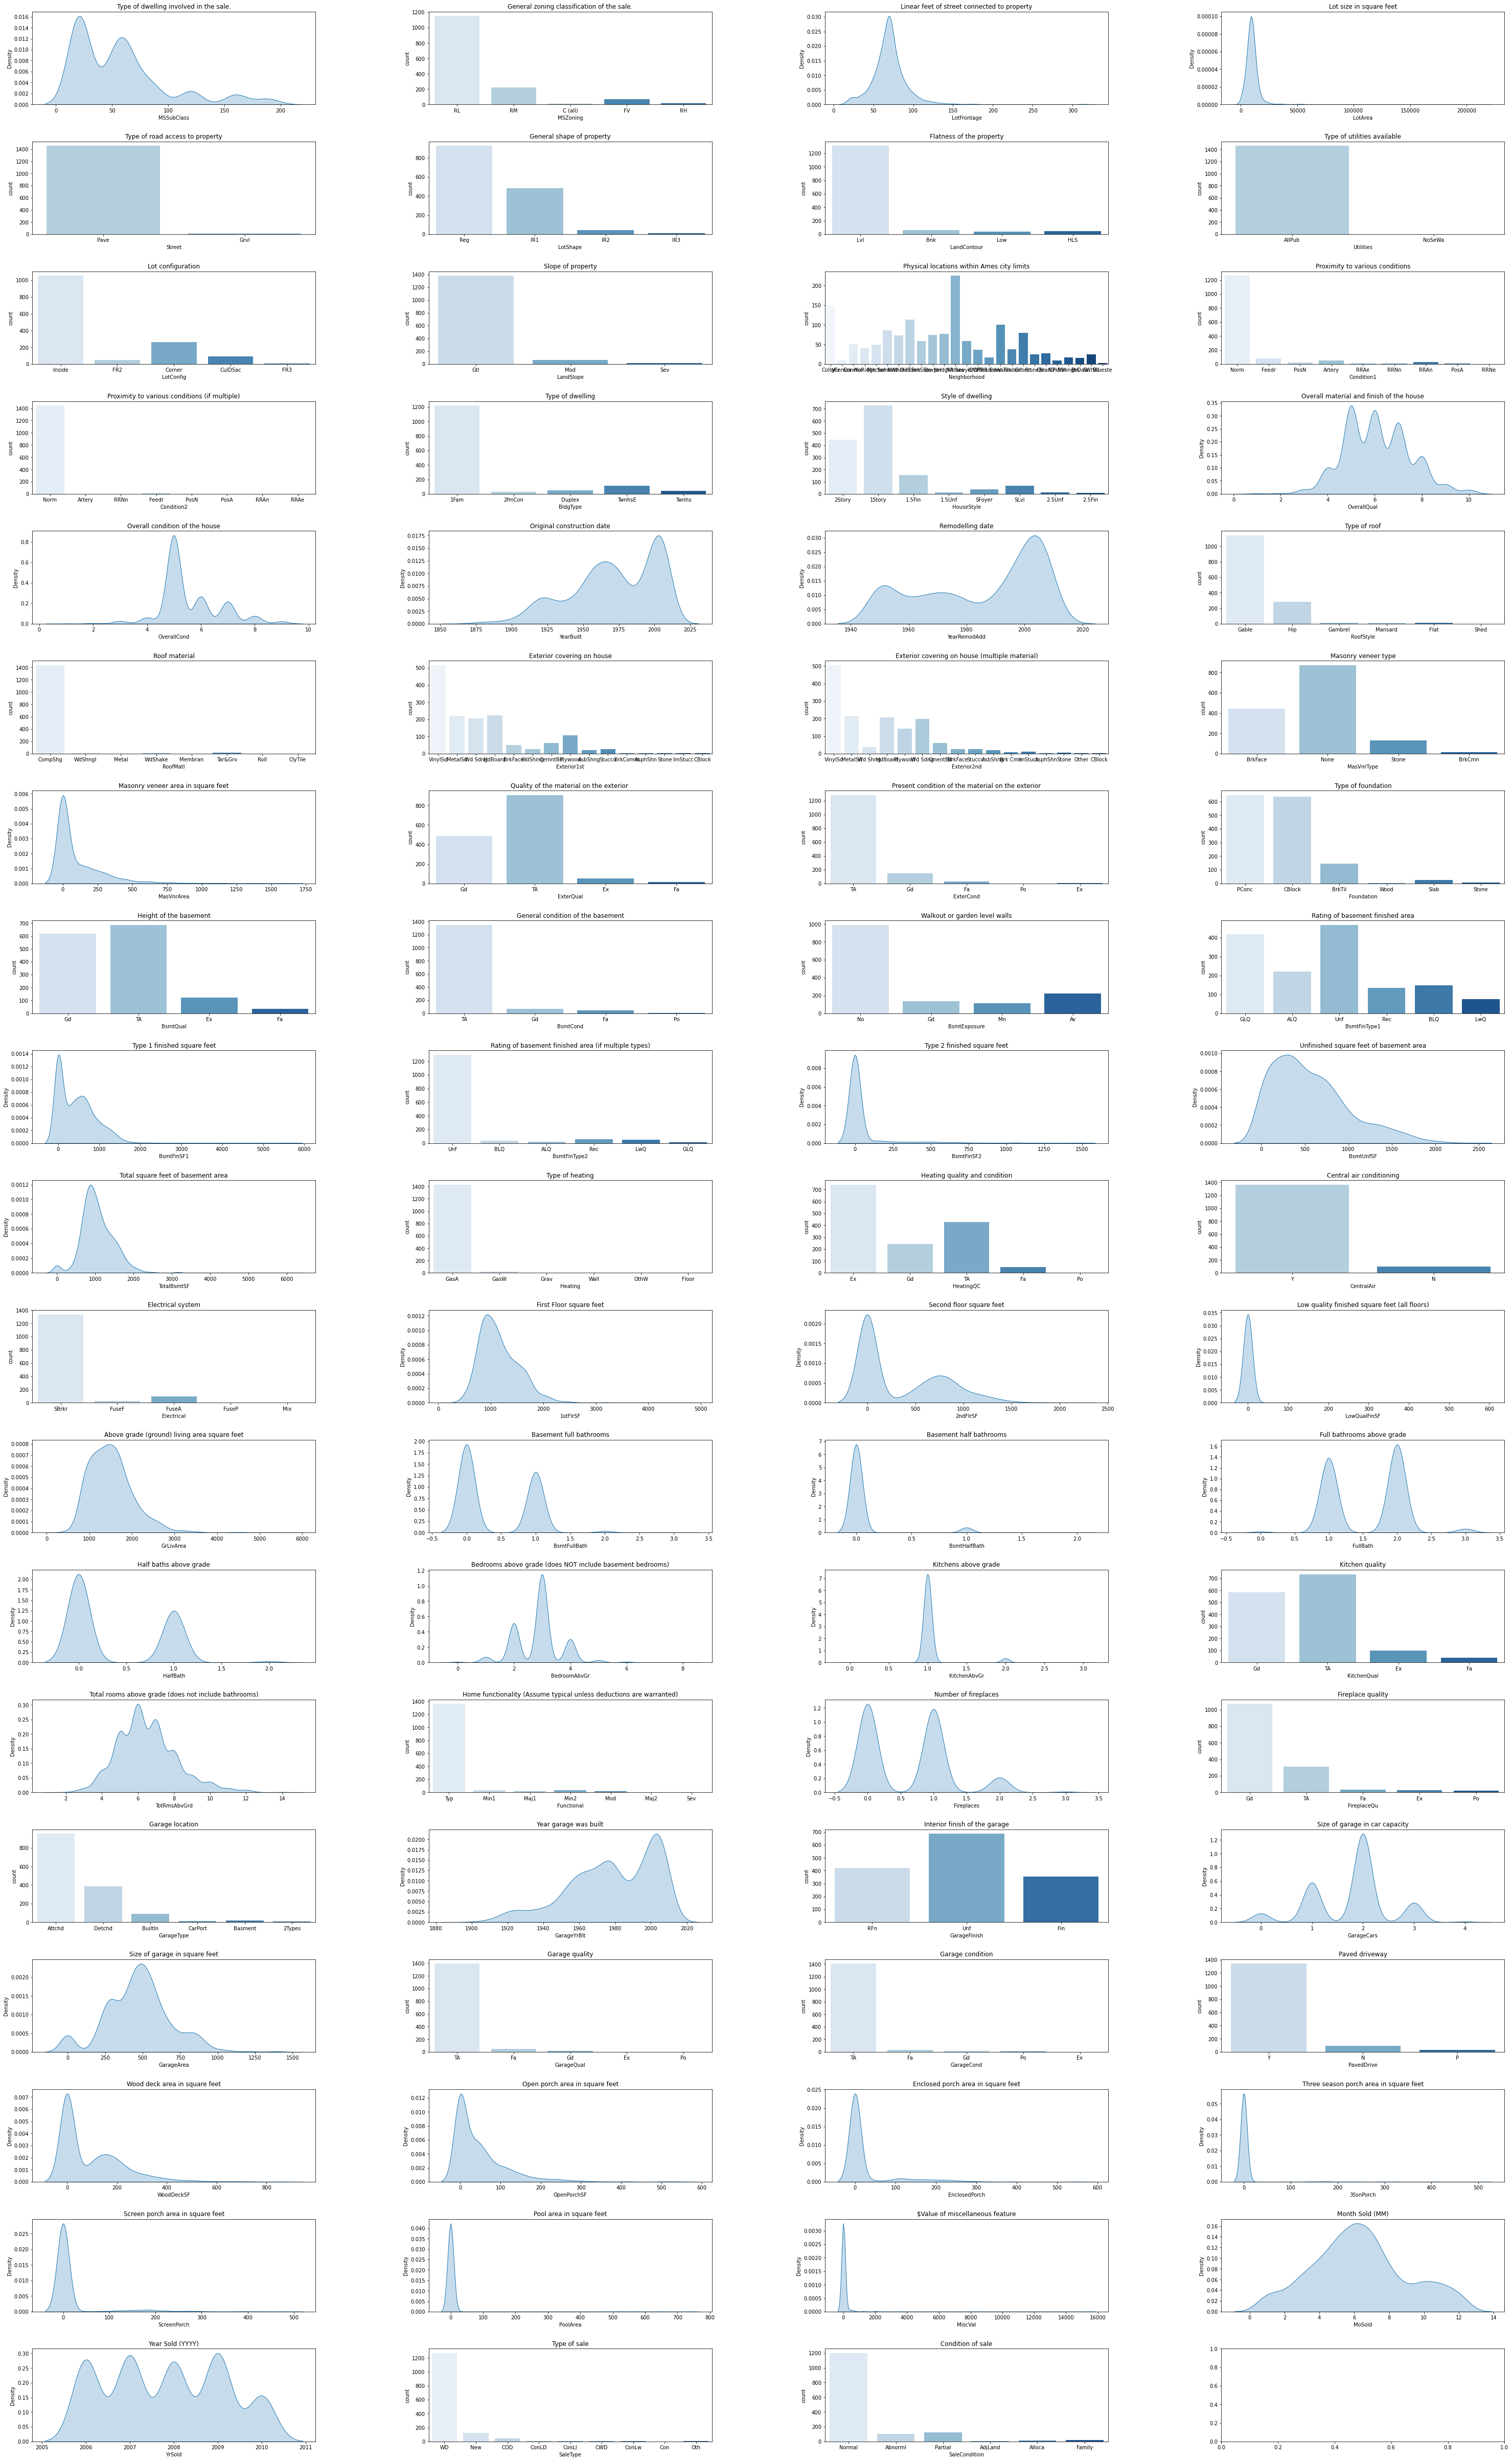

In [212]:
# As there are total 75 features, we will arrange them in 19 rows and 4 columns
univariate_analysis(df,column_data,row_count=19,col_count=4)

Insights from univariate analysis:

* 'MSSubClass': 'Type of dwelling involved in the sale is mostly between 20-80 range which inclues the below values:
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        
* 'MSZoning':'RL (Residential Low Density) is the maximum occuring value for General zoning classification of the sale' followed by 'RM' (Residential Medium Density)

* 'LotFrontage':'Linear feet of street connected to property mostly ranges between 65 to 75 feets'

* 'LotArea':'Lot size in square feet ranges between 3000 to 20000 range'

* 'Street':'Type of road access to property is mostly PAVED. Instances of GRAVEL roads are almost negligible'

* 'LotShape':'General shape of property is mostly REGULAR followed by Slighly irregular. There are very less instances of property with moderately irregular shape and the count of highly irregular property is almost negligible'

* 'LandContour':'Flatness of the property is almost Near Flat/Level. Instances of BANKED/HILLSIDE/DEPRESSION levels are almost equal with each other but very very less in number'

* 'Utilities':'Type of utilities available is All public Utilities (E,G,W,& S). Looks like all the properties are equipped with all these utilities'

* 'LotConfig':'Lot configuration is mostly INSIDE LOT followed by CORNER LOT. Next comes Cul-de-sac followed by very very low count of Frontage on 2 sides of property & almost negligible Frontage on 3 sides of property'

* 'LandSlope':'Slope of property is mostly GENTLE SLOPE. Very very less instances of MODERATE SLOPE and almost negligible instances of SEVERE SLOPE'

* 'Neighborhood':'Physical locations within Ames city limits' - ?????? UNCLEAR IN DIAGRAM

* 'Condition1':'Proximity to various conditions is mostly NORMAL with very less instances of ADJACENT TO ARTERIAL STREET and ADJACENT TO FEEDER STREET'

* 'Condition1':'Proximity to various conditions (if multiple) is almost NORMAL with a negligible instances of ADJACENT TO FEEDER STREET'

* 'BldgType':'Type of dwelling is mostly SINGLE-FAMILY-DETACHED and followed by less instances of TOWNHOUSE-END-UNIT. There are equal instances of TOWNHOUSE-INSIDE-UNIT and DUPLEX type'

* 'HouseStyle':'Style of dwelling is mostly 1-STOREY followed by 2-STOREY and then 1.5-STOREY WITH SECOND LEVEL FINISHED. Less instances of SPLIT-LEVEL'

* 'OverallQual':'Overall material and finish of the house mostly ranges from AVERAGE to GOOD'
       5	Average
       6	Above Average
       7	Good

* 'OverallCond':'Overall condition of the house is mostly AVERAGE'

* 'YearBuilt':'Original construction date', - ?????? NOT CLEAR. NEED TO CONVERT TO NUMBER(AGE OF HOUSE)

* 'YearRemodAdd':'Remodelling date' - ???? NOT CLEAR. NEED TO CONVERT TO NUMBER (AGE OF REMODELLING)

* 'RoofStyle':'Type of roof is mostly GABBLE followed by HIP. Instances of GABREL(BARN), MANSHARD & FLAT is very negligible'

* 'RoofMatl':'Roof material is almost STANDARD (COMPOSITE) SHINGLE. Very very negligible instances of GRAVEL&TAR'

* 'Exterior1st':'Exterior covering on house is majorly VINYL SIDING. METAL SIDING,WOOD SIDING & HARD BOARD SIDING are almost equal in number. Then comes PLYWOOD and followed by CEMENT BOARD'

* 'Exterior2nd':'Exterior covering on house (multiple material) is almost same as Exterior1st feature. Only a slight increase in the number of PLYWOOD coverings'

* 'MasVnrType':'Masonry veneer type is mostly None followed by BRICKFACE. Very less number of STONE and almost neglible counts of BRICK-COMMON'

* 'MasVnrArea':'Masonry veneer area in square feet' --- ??? Check in detail

* 'ExterQual':'Quality of the material on the exterior is mostly AVERAGE/TYPICAL followed by GOOD condition. Very less instances of EXCELLENT and almost negligible instances of FAIR condition'

* 'ExterCond':'Present condition of the material on the exterior is mostly AVERAGE/TYPICAL followed by very less GOOD condition. Very very less instances of FAIR and almost negligible instances of EXCELLENT condition'

* 'Foundation':'Type of foundation is mostly POURED-CONCRETE & CINDER-BLOCK (both equal in number) followed by less instances of BRICK-&-TILE. Very less instances of SLAB and almost negligible instances of WOOD and STONE'

* 'BsmtQual':'Height of the basement is mainly TYPICAL (80-89 inches) followed by GOOD (90-99 inches). Very less instances of EXCELLENT (100+ inches) and almost negligible instances of FAIR (70-79 inches)'

* 'BsmtCond':'General condition of the basement is mostly TYPICAL(slight dampness allowed) followed by more or less equal instances of GOOD and FAIR(dampness or some cracking or settling). Almost negligible instances of POOR(Severe cracking, settling, or wetness)'

* 'BsmtExposure':'Walkout or garden level walls is mostly NO-EXPOSURE followed by lesser instances of AVERAGE(split levels or foyers typically score average or above). This is followed by little lesser but equal occurences of GOOD and MINIMUM exposure'

* 'BsmtFinType1':'Rating of basement finished area is mostly UNFINISHED followed by GOOD-LIVING-QUARTERS. This is followed by AVERAGE-LIVING-QUARTERS and followed by lesser but equal occurences of AVERAGE-REC-ROOM and BELOW-AVERAGE-LIVING-QUARTERS. The least is of LOW-QUALITY'

* 'BsmtFinSF1':'Type 1 finished square feet' -- ?? NOT ABLE TO UNDERSTAND

* 'BsmtFinType2':'Rating of basement finished area (if multiple types) is mostly UNFINISHED. Very lesser instances of AVERAGE-REC-ROOM & LOW-QUALITY'

* 'BsmtFinSF2':'Type 2 finished square feet' --?? NOT ABLE TO UNDERSTAND

* 'BsmtUnfSF':'Unfinished square feet of basement area' --?? NOT ABLE TO UNDERSTAND

* 'TotalBsmtSF':'Total square feet of basement area has a mean value of close to 1000 sqft'

* 'Heating':'Type of heating is mostly GAS-FORCED-WARM-AIR-FURNACE while almost zero occurences of GAS-HOT-WATER-OR-STEAM-HEAT',

* 'HeatingQC':'Heating quality and condition is mainly EXCELLENT followed by lesser instances of AVERAGE/TYPICAL. Followed by GOOD and very lesser instances of FAIR' 

* 'CentralAir':'Central air conditioning is mostly present(YES) while very lesser instances of absent(NO)'

* 'Electrical':'Electrical system is majorly STANDARD-CIRCUIT-BREAKER-AND-ROMEX. Very lesser instances of FUSE-BOX-OVER-60-AMP-AND-ALL-ROMEX-WIRING (Average) and almost zero occurences of 60-AMP-FUSE-BOX-AND-MOSTLY-ROMEX-WIRING(Fair)'

* '1stFlrSF':'First Floor square feet is mostly having a mean around 1000 sqft'

* '2ndFlrSF':'Second floor square feet' --? NOT ABLE TO UNDERSTAND

* 'LowQualFinSF':'Low quality finished square feet (all floors) -- ?? NOT ABLE TO UNDERSTAND

* 'GrLivArea':'Above grade (ground) living area square feet is mostly between 1000 - 2000 sqft'

* 'BsmtFullBath':'Basement full bathrooms are mostly 0 followed by slightly lesser occurences of 1 but almost zero occurences of 2'

* 'BsmtHalfBath':'Basement half bathrooms are mostly 0 and very very lesser occurences of 1 bathroom'

* 'FullBath':'Full bathrooms above grade are mostly 2 followed by slightly lesser occurences of 1 but almost zero occurences of 3'

* 'HalfBath':'Half baths above grade are mostly 0 followed by lesser instances of 1 but almost zero occurences of 1'

* 'BedroomAbvGr':'Bedrooms above grade (does NOT include basement bedrooms) are mostly 3 followed by slightly lesser instances of 2 followed by lesser instances of 4. Very very lesser instances of 1,5 and 6'

* 'KitchenAbvGr':'Kitchens above grade is majorly 1 and close to zero instances of 2'

* 'KitchenQual':'Kitchen quality is mostly TYPICAL/AVERAGE followed by slightly lesser instances of GOOD. Very lesser instances of EXCELLENT and least occurences of FAIR'

* 'TotRmsAbvGrd':'Total rooms above grade (does not include bathrooms) typically varies in the range of 4 to 8'

* 'Functional':'Home functionality (Assume typical unless deductions are warranted) is mojorly TYPICAL. Very very lesser instances of MINOR-1 & MINOR-2 deductions. Almost zero occurences of MAJOR-DEDUCTIONS and MODERATE-DEDUCTIONS'

* 'Fireplaces':'Number of fireplaces are mostly 0 to 1 while very lesser occurences of 2'

* 'FireplaceQu':'Fireplace quality is mostly GOOD(Masonry Fireplace in main level) followed by lesser instances of AVERAGE(Prefabricated Fireplace in main living area or Masonry Fireplace in basement). Very very lesser but equal occurences of FAIR(Prefabricated Fireplace in basement), EXCELLENT(Exceptional Masonry Fireplace) and POOR(Ben Franklin Stove)'

* 'GarageType':'Garage location is majorly ATTACHED (Attached to home) followed by lesser instances of DETACHED(Detached from home) and followed by again lesser instances of BUILTIN(Garage part of house - typically has room above garage)'

* 'GarageYrBlt':'Year garage was built' --?? DID NOT UNDERSTAND

* 'GarageFinish':'Interior finish of the garage is mostly UNFINISHED followed by lesser but equal instances of ROUGH-FINISHED and FINISHED'

* 'GarageCars':'Size of garage in car capacity can accomodate mostly 2 cars followed by lesser instances of 1 followed by lesser instances of 3 cars. Very very lesser instances of 0 car'

* 'GarageArea':'Size of garage in square feet mostly varies between 250 - 600 sqft'

* 'GarageQual':'Garage quality is majorly TYPICAL/AVERAGE followed by very very lesser instances of FAIR and close to zero instances of GOOD'

* 'GarageCond':'Garage condition is majorly TYPICAL/AVERAGE. Very very less instances of FAIR'

* 'PavedDrive':'Paved driveway is mostly PAVED followed by very very lesser instances of DIRT/GRAVEL. Close to zero occurences of PARTIAL-PAVEMENT'

* 'WoodDeckSF':'Wood deck area in square feet' -- ?? DID NOT UNDERSTAND

* 'OpenPorchSF':'Open porch area in square feet' -- ?? DID NOT UNDERSTAND

* 'EnclosedPorch':'Enclosed porch area in square feet' -- ?? DID NOT UNDERSTAND

* '3SsnPorch':'Three season porch area in square feet' -- ?? DID NOT UNDERSTAND

* 'ScreenPorch':'Screen porch area in square feet'-- ?? DID NOT UNDERSTAND

* 'PoolArea':'Pool area in square feet'-- ?? DID NOT UNDERSTAND

* 'MiscVal':'Dollar Value of miscellaneous feature' -- ?? DID NOT UNDERSTAND

* 'MoSold':'Month Sold (MM) varies typically between 4-8'

* 'YrSold':'Year Sold (YYYY)' -- ?? DID NOT UNDERSTAND

* 'SaleType':'Type of sale is mostly WD(Warranty Deed - Conventional) followed by very lesser instances of NEW(Home just constructed and sold). Very very lesser instance of COD(Court Officer Deed/Estate)'

* 'SaleCondition':'Condition of sale is mostly NORMAL followed by lesser but equal number of ABNORMAL(Abnormal Sale -  trade, foreclosure, short sale) & PARTIAL(Home was not completed when last assessed (associated with New Homes)). Close to zero instances of other types'


# Bi-variate analysis (Don't execute this section for CatBoostClassifier)


### We need to convert the categorical features to numeric before starting the bi-variate analysis

In [288]:
# Check the count of CATEGORICAL features and NUMERICAL features
df.dtypes.value_counts()

object     39
int64      35
float64     3
dtype: int64

In [289]:
from sklearn.preprocessing import LabelEncoder

#cat_features = [col_name for col_name in df.columns if df[col_name].dtype == 'object']
cat_features = df.select_dtypes(include=['object','bool']).columns

print(cat_features)

if len(cat_features) > 0:
    print('Converting categorical features to Label-encoding  - START')
    for feature in cat_features:
        encoder = LabelEncoder()
        df[feature] = encoder.fit_transform(df[feature])
    print('Converting categorical features to Label-encoding  - END')
else:
    print('No categorical features found. Skipping the conversion step.')


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Converting categorical features to Label-encoding  - START
Converting categorical features to Label-encoding  - END


In [290]:
df.MSZoning.value_counts()

3    1151
4     218
1      65
2      16
0      10
Name: MSZoning, dtype: int64

In [291]:
# Find the correlation of input features w.r.t. output
corr_data = df.corr()['SalePrice']

In [292]:
# Convert this correlation data into a dataframe
corr_df = corr_data.to_frame()

<AxesSubplot:xlabel='Feature', ylabel='Correlation'>

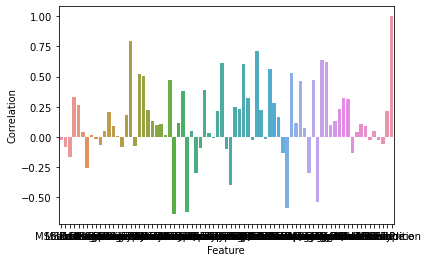

In [293]:
# Convert the index to column
corr_df.reset_index(inplace=True)
corr_df.columns = ['Feature','Correlation']
sns.barplot(x='Feature',y='Correlation',data=corr_df)

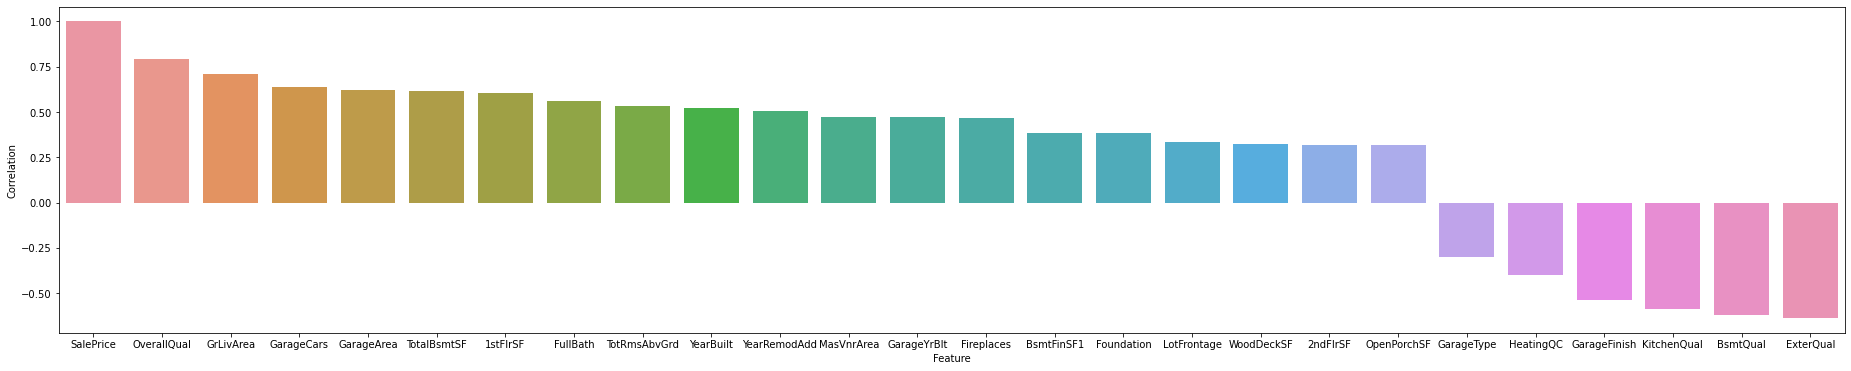

In [294]:
# AS THERE ARE SO MANY FEATURES, WE NEED TO RESTRICT THESE BY USING A CUTOFF ON CORRELATION VALUE

# Find the features having either > 0.3 OR > -0.3 correlation value
# Also sort the dataframe based on correlation values
corr_df = corr_df[np.absolute(corr_df.Correlation)>0.3]
corr_df.sort_values(by='Correlation',ascending=False,inplace=True)


plt.figure(figsize=(32,6))
sns.barplot(x='Feature',y='Correlation',data=corr_df)
plt.savefig('statistics/correlation.jpg')

# Dataset Preparation for model

In [295]:
X = df.copy().drop(['SalePrice'],axis=1)
Y = df.SalePrice

In [296]:
from sklearn.model_selection import train_test_split
train_X,test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.3,random_state=23)

print(f'Train set size --> Train-X : {train_X.shape} and Train-Y : {train_Y.shape}')
print(f'Test set size --> Test-X : {test_X.shape} and Test-Y : {test_Y.shape}')

Train set size --> Train-X : (1022, 76) and Train-Y : (1022,)
Test set size --> Test-X : (438, 76) and Test-Y : (438,)


# Models

## 1. Linear Regression

In [297]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Model score : 0.8355505983528246
R2 score : 0.8643639467174018


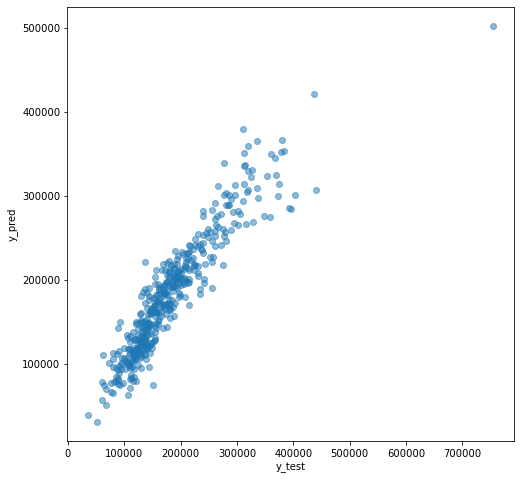

In [298]:
model.fit(train_X,train_Y)
predictions = model.predict(test_X)
print(f'Model score : {model.score(train_X, train_Y)}')

from sklearn import metrics
print(f'R2 score : {metrics.r2_score(test_Y, predictions)}')


# 2. Plot the scatter plot
plt.figure(figsize = (8,8))
plt.scatter(test_Y, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 2. RandomForestRegressor

In [299]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

Model score : 0.9783638675349093
R2 score : 0.8789804009621244


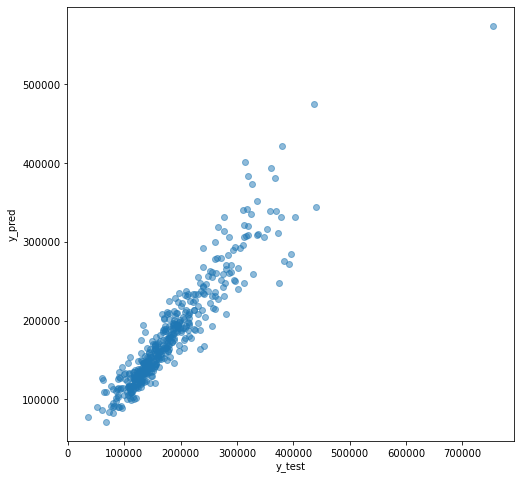

In [300]:
model.fit(train_X,train_Y)
predictions = model.predict(test_X)
print(f'Model score : {model.score(train_X, train_Y)}')

from sklearn import metrics
print(f'R2 score : {metrics.r2_score(test_Y, predictions)}')


# 2. Plot the scatter plot
plt.figure(figsize = (8,8))
plt.scatter(test_Y, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 3. GradientBoostingRegressor

In [301]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

Model score : 0.971720771900872
R2 score : 0.9001131145432879


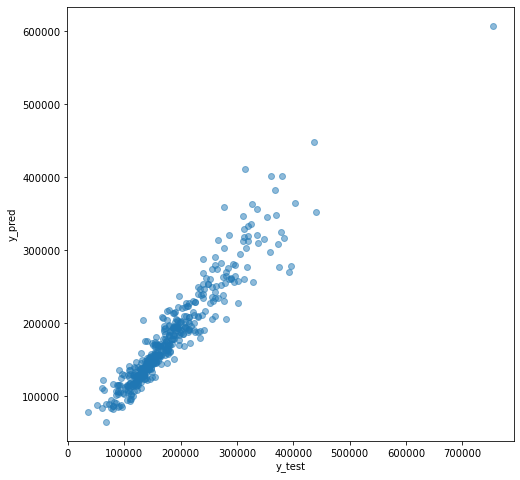

In [302]:
model.fit(train_X,train_Y)
predictions = model.predict(test_X)
print(f'Model score : {model.score(train_X, train_Y)}')

from sklearn import metrics
print(f'R2 score : {metrics.r2_score(test_Y, predictions)}')


# 2. Plot the scatter plot
plt.figure(figsize = (8,8))
plt.scatter(test_Y, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 4. XGBoost Regressor

In [303]:
import xgboost
classi = xgboost.XGBRegressor(colsample_bytree=0.5, subsample = 0.5, 
                               max_depth=4, min_child_weight=3.5, 
                               eta = 0.05, n_estimators=2000,
                               reg_alpha=0.5, reg_lambda=0.8, 
                               gamma=0.05)

Model score : 0.971720771900872
R2 score : 0.9006758030995922


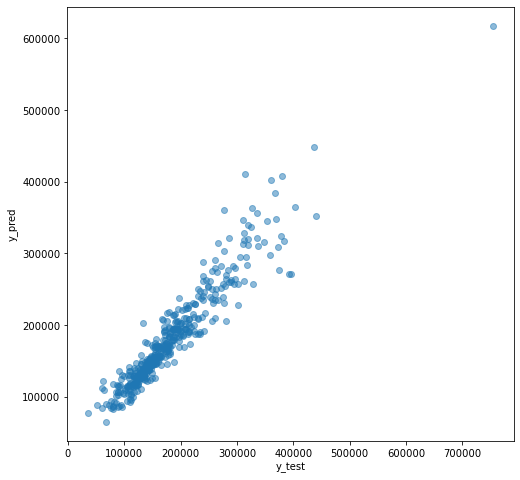

In [304]:
model.fit(train_X,train_Y)
predictions = model.predict(test_X)
print(f'Model score : {model.score(train_X, train_Y)}')

from sklearn import metrics
print(f'R2 score : {metrics.r2_score(test_Y, predictions)}')


# 2. Plot the scatter plot
plt.figure(figsize = (8,8))
plt.scatter(test_Y, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 5. CatBoost Regressor

In [305]:
#!pip install catboost

from catboost import CatBoostRegressor
model = CatBoostRegressor(verbose=0)

Model score : 0.9961604016360531
R2 score : 0.9119683497087354


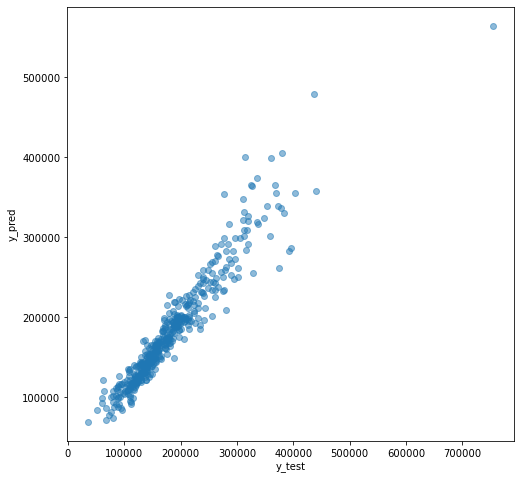

In [306]:
model.fit(train_X,train_Y)
predictions = model.predict(test_X)
print(f'Model score : {model.score(train_X, train_Y)}')

from sklearn import metrics
print(f'R2 score : {metrics.r2_score(test_Y, predictions)}')


# 2. Plot the scatter plot
plt.figure(figsize = (8,8))
plt.scatter(test_Y, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Training multiple models with hyper-parameter tuning

In [249]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def model_analysis(X,Y,test_size,random_state,cv_fold_count=5,optimize=False):
    print('\n\n----------------------------------- \n ----------- MODEL ANALYSIS-------- \n -----------------------------------')
    print('STEP-1 : Prepare the training and test data')
    print('Prepate training & test data - START')
    X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state)
    print('Prepate training & test data - FINISH')
    
    
    print('\n\nSTEP-2 : Standard scaling to standardize the input to have 0 mean and 1 standard deviation')
    print('Standard scaling - START')
    std_scaler = StandardScaler()
    X_train = std_scaler.fit_transform(X_train)
    X_test = std_scaler.transform(X_test)
    print('Standard scaling - FINISH')
    
    print('\n\nSTEP-3 : Train some basic classifiers')
    
    print('\n -------- Models we considered for training ----------')
    print('1. LR (Linear Regression)')
    print('2. Random Forest (Random Forest Regressor)')
    print('3. GradientBoostingRegressor (Gradient Boosting Regressor)')
    print('\n\n -----------------------------------------------------')
    
    print('\n Define the parameters for these models')
    
    param_lr = [
        {
            'penalty' : ['l2'],
            'solver' : ['newton-cg'],
            'C': np.linspace(0.00002,1,100)
        },
        {
            'penalty' : ['l1','l2','elasticnet'],
            'solver' : ['liblinear'],
            'C': np.linspace(0.00002,1,100)
        }
    ]
    

    param_rfc = [
        {
            'criterion': ['gini', 'entropy'],
            'n_estimators': [100, 300, 500, 750, 1000],
            'max_features': [2, 3],
        }
    ]
    
    param_gbr = [
        {
            'max_depth' : [int(x) for x in np.linspace(start=5, stop=50, num=5)],
            'learning_rate' : [0.3, 0.1]
        }
    ]
    
    print('\n Define the models using the parameters')
    # Define models
    MODELS = [
        ('LR',LinearRegression(),param_lr),
        ('RF',RandomForestRegressor(),param_rfc),
        ('GBR',GradientBoostingRegressor(),param_gbr)
    ]
    
    model_results = []
    
    for model_name, model, params in MODELS:
        print('*************************************************************************************')
        print(f'\n\n*************************   MODEL : {model_name}  ******************************')
        print('*************************************************************************************')
        # Train the model
        model.fit(X_train, Y_train)
        # Predict
        predictions = model.predict(X_test)
        # Find accuracy
        test_accuracy = metrics.r2_score(Y_test, predictions) * 100
        print(f'Test Accuracy : {test_accuracy}')
        # Apply K-Fold Cross validation
        val_accuracies = cross_val_score(estimator=model,X=X_train,y=Y_train,cv=cv_fold_count, scoring='r2')
        val_accuracy = val_accuracies.mean() * 100
        val_std = val_accuracies.std() * 100
        print(f'Accuracy after applying K-Fold Cross Validation : {val_accuracy}%')
        print(f'Standard deviation after applying K-Fold Cross Validation : {val_std}%')
        
        # Initialize the accuracy before model tuning (if enabled)
        optimized_accuracy = '#NA'
        
        if optimize == True and not model_name == 'GNB':
            print('\n ---- MODEL OPTIMIZATION USING GRID SEARCH ----')
            optimized_model = GridSearchCV(
                estimator=model, 
                param_grid=params, 
                scoring='r2', 
                cv=cv_fold_count,
                n_jobs=1,
                verbose=1
            )
            optimized_model.fit(X_train,Y_train)
            optimized_accuracy = optimized_model.best_score_ * 100
            best_params = optimized_model.best_params_
            print(f'Best accuracy after optimization : {optimized_accuracy}%')
            print(f'Best parameters after optimization : {best_params}%')
        
        # Add the best accuracy for the model to the result list
        model_results.append((model_name,val_accuracy,optimized_accuracy,test_accuracy))
    
    print('\n==================== MODEL COMPARISON =====================\n')
    model_results = sorted(model_results, key = lambda x : x[1] , reverse=True)
    model_results = pd.DataFrame(model_results,columns=['model','val_accuracy','tuned_model_accuracy','test_accuracy'])
    print(model_results)
    
    sns.barplot(x=model_results.model, y=model_results.val_accuracy)
    
    
    
    
    
    
    
    



----------------------------------- 
 ----------- MODEL ANALYSIS-------- 
 -----------------------------------
STEP-1 : Prepare the training and test data
Prepate training & test data - START
Prepate training & test data - FINISH


STEP-2 : Standard scaling to standardize the input to have 0 mean and 1 standard deviation
Standard scaling - START
Standard scaling - FINISH


STEP-3 : Train some basic classifiers

 -------- Models we considered for training ----------
1. LR (Linear Regression)
2. Random Forest (Random Forest Regressor)
3. GradientBoostingRegressor (Gradient Boosting Regressor)


 -----------------------------------------------------

 Define the parameters for these models

 Define the models using the parameters
*************************************************************************************


*************************   MODEL : LR  ******************************
*************************************************************************************
Test Accuracy : 

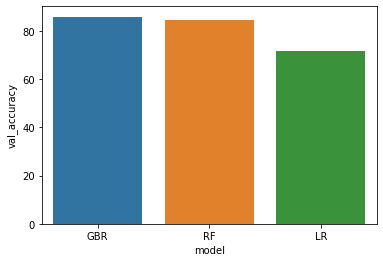

In [250]:
model_analysis(X,Y,0.3,23,optimize=False)